# Using Recurrent Neural Network for Reviews Sentiment Analysis

Contributors:
- Navneet Mittal (055026)
- Saloni Gupta (055039)

---
## Objective

To design, implement, and evaluate a deep learning-based sentiment analysis model using RNN architecture. This model aims to classify movie reviews based on sentiment by leveraging the sequential patterns present in text data.

---

# **Dataset Description**

## **Overview**
The dataset contains movie reviews with sentiment labels, structured as follows:

### **Columns:**
1. **Movie Name** – The title of the movie being reviewed.
2. **Rating** – A numerical rating given by the reviewer (ranges from 1 to 10).
3. **Review** – The text-based review of the movie.
4. **Sentiment** – The sentiment classification of the review:
   - **Positive**: The review expresses a favorable opinion.
   - **Negative**: The review expresses an unfavorable opinion.

## **Key Characteristics**
- The dataset includes reviews for multiple movies, such as *La La Land, Pinocchio, and RRR*.
- Reviews vary in length and writing style, providing diverse textual data.
- The sentiment column acts as the **target variable** for classification.

### **Shape Of Data** - (50000,2)
### **Size of Data** - 64,477 kb
### **Source of Data** - Kaggle
### **Link to Data** - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715&sortBy=dateRun&tab=profile
---

## Problem Statement

- Online movie reviews significantly influence public opinion.
- Classifying sentiment is challenging due to language complexity.
- The goal is to develop a machine learning model for sentiment analysis.
- An RNN-based approach will be used to capture contextual information.
- The model will classify reviews as positive, negative, or neutral.

---

## Key Tasks

### 1. Data Preprocessing

The data preprocessing stage prepares the movie review dataset to ensure compatibility with the RNN model. The key steps are:

#### **I) Sentiment Encoding**
- Positive Sentiment → Encoded as **1**
- Negative Sentiment → Encoded as **0**

#### **II) Text Normalization**
- **Removing Special Characters:** Stripping unnecessary characters (e.g., punctuation, special symbols) to clean the text.
- **Lowercasing:** Converting all reviews to lowercase for uniformity and consistency.

#### **III) Tokenization**
- Splitting the text into individual tokens (words).
- Using a vocabulary size of **20,000** most frequent words (`max_features=20000`). Any words outside this range are replaced with a placeholder token.

#### **IV) Sequence Padding**
- Ensuring all tokenized reviews are of the same length by:
  - Padding shorter sequences with zeros at the beginning or end.
  - Truncating longer sequences to a maximum length of **400** tokens (`max_length = 400`).

---

### 2. Model Development

To build a model that classifies movie reviews as positive or negative, we follow these steps:

#### **I) Using the Data**

**Training Data:**
- The training data consists of **50,000** records with the following **2 columns**:
  - **Reviews:** The textual review of the movie.
  - **Sentiment:** The sentiment label (positive or negative).
- A random sample of **40,000** reviews is selected using a random state of **5502639** to ensure reproducibility.

**Testing Data:**
- The testing data consists of **151** records with the following **4 columns**:
  - **Movie Name:** The title of the movie.
  - **Rating:** The rating given to the movie.
  - **Reviews:** The textual review of the movie.
  - **Sentiment:** The sentiment label (positive or negative).
- This dataset was created by manually scraping the data on reviews and ratings of various movies from **Metacritic**.

#### **II) Model Structure**

The model is built step by step with these layers:

##### **Embedding Layer**
- **Input dimension:** 20,000 (vocabulary size)
- **Output dimension:** 128 (word embedding size)
- **Input length:** 400 (maximum sequence length)

##### **Recurrent Layer**
- **Type:** SimpleRNN
- **Number of units:** 64
- **Activation function:** Tanh
- **Return sequences:** False (since it’s a single RNN layer)
- **Regularization:** Dropout (0.2) to prevent overfitting

##### **Fully Connected Layer**
- **Type:** Dense layer
- **Number of neurons:** 1
- **Activation function:** Sigmoid (for binary classification)

#### **III) Training the Model**

The model is trained on IMDB reviews by splitting the sampled dataset of **40,000** reviews into **80%** for training and **20%** for testing, ensuring the model learns effectively while being evaluated on unseen data during training.

**Model Compilation and Training:**

- **Loss Function:** Binary Crossentropy (suitable for binary classification)
- **Optimizer:** Adam (learning rate = 0.001)
- **Batch Size:** 32
- **Epochs:** 15 (With early stopping)

**Early Stopping Criteria:**
- **Monitored metric:** Validation Loss
- **Patience:** 3 epochs
- **Best weights restored** if validation loss does not improve
- The model was trained for **10** epochs initially and then for an additional **5** epochs.

#### **IV) Testing the Model with Metacritic Data**
- After training on IMDB reviews, the model is tested on the **100 manually collected Metacritic reviews**.
- Performed data preprocessing, tokenization, and sequence padding as performed with the training dataset.

#### **V) Predicting Sentiment for New Reviews**
Once trained, the model can predict whether new reviews are **positive or negative**.

---

## 3. Observations

- **Training accuracy** increased steadily, reaching approximately **87%** after **10 epochs**.
- **Validation accuracy** remained stable at around **85%**, indicating good generalization.
- The final **test accuracy** on the IMDB test set was around **70%**, suggesting a slightly well-trained model with room for improvement.
- Training loss started to decrease significantly with every epoch, with potential signs of overfitting mitigated by **early stopping and dropout**.
- The model performed similarly on the Metacritic dataset, achieving a **test accuracy of approximately 70%**, showing that it generalizes well across different review datasets but could improve if **LSTM was used instead of RNN**.
- Early stopping was triggered after a few epochs in both training phases, preventing overfitting and ensuring that the best model was retained.

---

## 4. Managerial Insights

### **Model Effectiveness & Business Implications**
- The RNN model performs well on the IMDB dataset but generalizes **poorly** on Metacritic reviews.
- This suggests that Metacritic reviews might have **different writing styles, slang, or review structures** compared to IMDB.

### **Improvement Areas**
- **Better Preprocessing:** Introduce techniques like stemming, lemmatization, stop-word removal, and n-grams to improve accuracy.
- **More Complex Architectures:** RNNs have limited long-term memory; switching to **LSTMs** may enhance generalization.
- **Larger Dataset & Augmentation:** Training on a combined dataset of IMDB and Metacritic reviews may improve model robustness.
- **Domain Adaptation:** Fine-tuning the model specifically on Metacritic reviews could improve cross-domain accuracy.

### **Business Applications**
- **Customer Sentiment Monitoring:** Companies can use this model to analyze movie, product, or service reviews to gauge public opinion.
- **Brand Reputation Analysis:** Identifying sentiment trends can help businesses manage PR crises and improve customer engagement.
- **Automated Review Filtering:** Businesses can filter out fake reviews or spam using an improved sentiment classification model.

---

## 5. Conclusion & Recommendations

### **Immediate Steps:**
- Improve text preprocessing by handling stop words and using TF-IDF weights.
- Fine-tune the model using **transfer learning** with additional datasets.
- Consider switching to **LSTM/GRU-based models** for improved generalization.

### **Long-Term Strategy:**
- Expand training data by incorporating reviews from multiple platforms.
- Implement **real-time sentiment tracking** in a dashboard for actionable insights.
- Conduct **A/B testing** with different architectures to find the best-performing model.

By implementing these recommendations, the sentiment analysis model can achieve **higher accuracy (target: 75%+)** and be effectively deployed for business use cases.


## 1. Importing the Libraries


In [1]:
!pip install tensorflow
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding,Dropout


## 2. Preparing the Dataset

In [4]:
import pandas as pd
import io
import requests

# Google Drive File Link (URL) of Test Dataset
url = "https://drive.google.com/file/d/1GGQ5Ba-GZ9mLYk3rKrdRWKclCGAmY2fq/view?usp=drive_link"

# Extract the File Id from the URL
file_id = url.split('/')[-2]

# Construct the Download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the File Content
response = requests.get(download_url)
response.raise_for_status()  # Raise an Exception for Bad Responses

# Read the Training Dataset
nmsg2639_data1 = pd.read_csv(io.StringIO(response.text))

# Display Traing Dataset Information
print("Columns in the dataset are:")
print(nmsg2639_data1.columns.tolist())
print("Shape of the data is:")
nmsg2639_data1.shape

Columns in the dataset are:
['review', 'sentiment']
Shape of the data is:


(50000, 2)

### 2.1 Creating a random state of 40000 records

In [5]:
nmsg2639_data = nmsg2639_data1.sample(n=40000, random_state=5502639)
nmsg2639_data.head()

,review,sentiment
3401,Four stories written by Robert Bloch about var...,positive
26154,Another comedy about a plucky little country s...,positive
12894,"Billed as a kind of sequel to The Full Monty, ...",negative
31773,I seem to be disagreeing with a lot of folks h...,negative
26146,I think that would have been a more appropriat...,negative


### 2.2 Data cleaning and pre-processing

In [6]:
nmsg2639_data["review"] = nmsg2639_data["review"].str.lower() # Convert all text to lowercase
nmsg2639_data["review"] = nmsg2639_data["review"].replace(r'[^a-z0-9\s]', '', regex=True) # Remove Special Characters and Punctuation

nmsg2639_data['sentiment value'] = nmsg2639_data['sentiment'].apply(lambda x: 1 if x== "positive" else 0) # Convert labels into numerical values
nmsg2639_data = nmsg2639_data.dropna() # Remove missing values

### 2.3 Tokenizing and Padding of dataset

In [7]:
nmsg2639_max_features = 20000
nmsg2639_max_length =400

tokenizer = Tokenizer(num_words=nmsg2639_max_features)
tokenizer.fit_on_texts(nmsg2639_data["review"])
X = pad_sequences(tokenizer.texts_to_sequences(nmsg2639_data["review"]), maxlen=nmsg2639_max_length)
y = nmsg2639_data['sentiment value'].values


### 2.4 Spliting of dataset into test, train and validation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5502639, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=5502639, stratify=y_train
)


## 3. Model Preparation

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
nmsg2639_model1 = Sequential([
    Embedding(input_dim=nmsg2639_max_features, output_dim=128, input_length=nmsg2639_max_length),
    SimpleRNN(64, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid'),
    Dropout(0.2),  # Helps prevent overfitting
])

nmsg2639_model1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 3.1 Hyperparameter Tuning

In [10]:
!pip install keras_tuner
import keras_tuner as kt
def build_model(hp):
    model = Sequential([
        Embedding(input_dim=nmsg2639_max_features, output_dim=hp.Choice('embedding_dim', [64, 128, 256]), input_length=nmsg2639_max_length),
        SimpleRNN(hp.Choice('rnn_units', [32, 64, 128]), return_sequences=True),
        Dropout(hp.Choice('dropout_1', [0.2, 0.3, 0.5])),
        SimpleRNN(hp.Choice('rnn_units_2', [32, 64]), return_sequences=False),
        Dropout(hp.Choice('dropout_2', [0.2, 0.3, 0.5])),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuner_dir',
    project_name='sentiment_analysis'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 10 Complete [00h 06m 48s]
val_accuracy: 0.8199999928474426

Best val_accuracy So Far: 0.8831250071525574
Total elapsed time: 01h 14m 47s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
256               |64                |embedding_dim
64                |32                |rnn_units
0.2               |0.3               |dropout_1
32                |64                |rnn_units_2
0.3               |0.3               |dropout_2
0.0005            |0.0001            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
  6/900 ━━━━━━━━━━━━━━━━━━━━ 3:52 260ms/step - accuracy: 0.4941 - loss: 0.7134

KeyboardInterrupt: 

### 3.2 Model Building

In [11]:
nmsg2639_early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True )

nmsg2639_history11 = nmsg2639_model1.fit(
     X_train, y_train,
     epochs=10,
     batch_size=32,
     validation_data=(X_val, y_val),
     callbacks=[nmsg2639_early_stopping],  # Stops if validation loss doesn't improve
     verbose=1
 )

nmsg2639_score = nmsg2639_model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {nmsg2639_score[1]:.2f}")


Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 124s 136ms/step - accuracy: 0.5411 - loss: 2.1417 - val_accuracy: 0.7597 - val_loss: 0.5449
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 119s 133ms/step - accuracy: 0.7385 - loss: 2.0397 - val_accuracy: 0.8275 - val_loss: 0.4252
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 120s 133ms/step - accuracy: 0.8096 - loss: 1.8580 - val_accuracy: 0.8625 - val_loss: 0.3585
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 141s 131ms/step - accuracy: 0.8438 - loss: 1.8395 - val_accuracy: 0.8825 - val_loss: 0.3137
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 140s 130ms/step - accuracy: 0.8635 - loss: 1.7505 - val_accuracy: 0.6556 - val_loss: 0.6486
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 142s 129ms/step - accuracy: 0.8096 - loss: 1.7722 - val_accuracy: 0.8731 - val_loss: 0.3199
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.8735 - loss: 1.7852 - val_accuracy: 0.8778 - val_loss: 0.3065
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 142s 130ms/step - accuracy: 0.8894 -

In [13]:
# running code for 5 more epochs
nmsg2639_history1 = nmsg2639_model1.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[nmsg2639_early_stopping],  # Stops if validation loss doesn't improve
    verbose=1
)

nmsg2639_score = nmsg2639_model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {nmsg2639_score[1]:.2f}")
# this accuracy is on the test data of IMDB Dataset

Epoch 1/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 131s 146ms/step - accuracy: 0.8735 - loss: 1.7454 - val_accuracy: 0.6528 - val_loss: 0.6244
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 131s 134ms/step - accuracy: 0.8357 - loss: 1.7655 - val_accuracy: 0.8419 - val_loss: 0.3773
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 139s 131ms/step - accuracy: 0.8945 - loss: 1.6242 - val_accuracy: 0.8500 - val_loss: 0.3739
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.8973 - loss: 1.6318 - val_accuracy: 0.8575 - val_loss: 0.3645
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.9030 - loss: 1.5642 - val_accuracy: 0.8587 - val_loss: 0.3729
Test accuracy: 0.85


In [14]:
nmsg2639_model1.save('nmsg2639_model12.keras')

## 4. Loading Metacritic dataset for testing

In [15]:
# Google Drive File Link (URL) of Test Dataset
url = "https://drive.google.com/file/d/1miAqhkl26w6DVRSe-Z85uNZeZkAFNb-R/view?usp=drive_link"

# Extract the File Id from the URL
file_id = url.split('/')[-2]

# Construct the Download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the File Content
response = requests.get(download_url)
response.raise_for_status()  # Raise an Exception for Bad Responses

# Read the Test Dataset
nmsg2639_test_data1 = pd.read_csv(io.StringIO(response.text))

# Display Test Dataset Information
print("Columns in the dataset:")
print(nmsg2639_test_data1.columns.tolist())
nmsg2639_test_data1.head()

Columns in the dataset:
['Movie Name', 'Rating', 'Review', 'sentiment']


,Movie Name,Rating,Review,sentiment
0,La La Land,10,Damien Chazelle’s La La Land is a dazzling rom...,positive
1,La La Land,10,"The song ""City of Stars"" as a duet encapsulate...",positive
2,La La Land,6,"""La La Land"" does combine Chazelle's fun camer...",positive
3,La La Land,3,I found this movie to be an insult to jazz. Th...,negative
4,La La Land,3,I didn't like the story much. It has some good...,negative


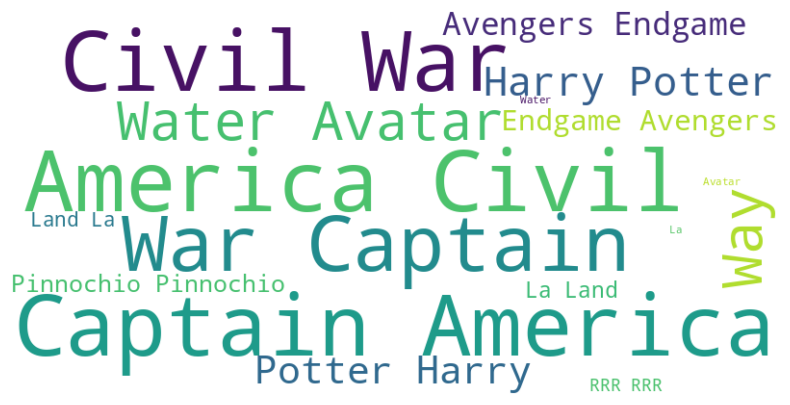

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter data for positive sentiment
positive_reviews = nmsg2639_test_data1[nmsg2639_test_data1['sentiment'] == 'positive']

# Combine movie names into a single string
movie_names = ' '.join(positive_reviews['Movie Name'])

# Create and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(movie_names)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4.1 Data cleaning and pre-processing

In [17]:
nmsg2639_test_data1["Review"] = nmsg2639_test_data1["Review"].str.lower()
nmsg2639_test_data1["Review"] = nmsg2639_test_data1["Review"].replace(r'[^a-z0-9\s]', '', regex=True)

nmsg2639_test_data1['sentiment value'] = nmsg2639_test_data1['sentiment'].apply(lambda x: 1 if x== "positive" else 0)
nmsg2639_test_data1 = nmsg2639_test_data1.dropna()


### 4.2 Tokenizing and padding

In [18]:

# tokenizer = Tokenizer(num_words=20000)
# tokenizer.fit_on_texts(nmsg2639_test_data1["Review"])
X = pad_sequences(tokenizer.texts_to_sequences(nmsg2639_test_data1["Review"]), maxlen=nmsg2639_max_length)
y = nmsg2639_test_data1['sentiment value'].values


## 4.3 Accuracy on Metacritic test dataset

In [20]:
score = nmsg2639_model1.evaluate(X, y, verbose=0)
print(f"Test accuracy: {score[1]:.2f}")

Test accuracy: 0.70
